<font size = 7> Deep Learning </font>

*Alejandro Madriñán Fernández*

![](https://www.etsit.upm.es/fileadmin/documentos/laescuela/la_escuela/galerias_fotograficas/Servicios/generales/logos/LOGO_ESCUELA/LOGO_ESCUELA.png)

# Introduction

*Deep Learning* is framed inside the *Machine Learning* environment.
When traditional machine learning techniques lack strength, deep learning comes as an excellent alternative. The great flexibility their models achieve makes them ideal for complicated tasks.

Models in the machine learning field are built to mimic a certain relationship between a **response** and a set of **predictors**. Given that the true relationship between the two parts, function $f(·)$, exists, the model will develop a function $\hat{f}(·)$ that approximates $f(·)$ according to a certain internal method, dependant on the model.

While traditional machine learning approaches involve making certain assumptions on the model and working over a set of pre-adapted features, the deep learning approach is to learn the form of $\hat{f}(·)$ without making any specific assumptions or being restricted by a general shape. In the process, deep learning models are able to also perform the task known as *feature extraction*, this is, transforming the original predictors to fill the needs of the problem. Their downside is that the computations needed will become more expensive as the complexity increases, but that is only natural when facing a complex challenge.

This report aims at presenting the structure of some of the more basic architectures inside deep learning, which are the basis of some more complicated state-of-the-art models.

## Neural Network

One of the big claims of deep learning is that its models are able to reach a level of cognition comparable to that of the human mind (for a given task) because, in a sense, they tries to mimic the brain's behaviour. In fact, deep learning's models are often referred to as *neural networks*. As the name suggests, the basic learning unit in a deep learning model is a neuron.

A deep learning neuron, much like a biological neuron, receives impulses that can then activate said neuron. Unlike a biological neuron, deep learning neurons act first on the coming signal and only afterwards decide if to pass it on or deactivate.

<img src="https://www.researchgate.net/profile/Mohammad_Bataineh5/publication/335190001/figure/fig1/AS:792206994587652@1565888274951/Schemes-for-human-brain-neuron-and-an-artificial-neural-network-ANN.png" width="500"/>

Specifically, neurons apply a linear combination of their input singals $x_i$ to an activation function. It can be expressed as

$$ y = h \left( \sum_i{(x_i w_i) + b} \right) = h ( \mathbf{x}^T \mathbf{w} + b ) $$

where $h(·)$ is the activation function that has as its input the product of the vector of inputs, $\mathbf{x}$, and the vector of *weights* given to those inputs $\mathbf{w}$. Additionally, before the activation function, a certain amount of bias ($b$) is added to the signal.

There are a lot of different activation functions with different behaviours. Nevertheless, most of them are variations of the next three:

- *Sigmoid* function. Traditional activation function used widely for its atractive computational properties. Its output $y$ verifies that $y \in (0, 1)$.

$$ h_{sigmoid}(x) = \frac{e^x}{1 + e^x} = \frac{1}{1 + e^{-x}} = \sigma(x) $$

- *Rectified Linear Unit* function. Commonly known as ReLU, its major advantage is that is able to deactivate neurons when the input is not significant.

$$ h_{relu}(x) = \bigg\{ \begin{matrix} x & x \gt 0 \\ 0 & x \leq 0 \end{matrix} = \max(0, x) $$

- *Hyperbolic Tangent* function. Is similar to the sigmoid function but its output ranges from $y \in (-1, 1)$, giving more freedom to the learning process.

$$ h_{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{\sinh(x)}{\cosh(x)} = \tanh(x) $$

<!-- matplotlib plot -->
<!-- <img src="" alt="" align="left" width="" style="padding: 0 15px; float: left;"/> -->

Neurons are connected with each other forming a network and the impulses change as they travel through the network.

<img src="https://www.researchgate.net/profile/Zhenzhu_Meng/publication/339446790/figure/fig2/AS:862019817320450@1582532948784/A-biological-neuron-in-comparison-to-an-artificial-neural-network-a-human-neuron-b.png"  width="500"/>

Neural networks are constructed as a set of layers one on top of another. Every layer containing a defined number of neurons.
The first and last layers are called input and output layer, and every other layer in between is a hidden layer.

The name **deep** learning is inspired by the high number of hidden layers that in some cases these models have. As the depth of the model is measured with the number of layers.

## Optimization

Deep learning problems can be formulated as *optimization* problems. The optimization strategies are based on minimizing a loss function or maximizing a gain function. Depending on the problem, in deep learning we will use the following cost functions:

- Classification: *maximum likelihood estimation* (MLE) or *cross-entropy*. The cross-entropy statistic can be computed from the MLE like this

$$ CE = - \log( \theta_{MLE} ) $$

- Regression: MSE (mean standard error) or MAE (mean average error). The average error based on either the $\ell_2$ or $\ell_1$ norm respectively.

### Algorithms

There is a large number of alternatives for learning the optimal set of weights for each neuron. And, as a general rule, there is no algorithm that outperforms the rest. In this regard, depending on your problem, there might even not be a better solution and you can achieve similar results with different algorithms.

These methods, as a general rule, have in common that are based on moving in the opposite direction of the gradient of the cost function ($-\frac{dy}{dx}$). There are several aspects to be taken into account when moving towards the minimum. In fact, most of the times is not possible to ensure that the algorithm will reach the **global** minimum but a **local** one (unless the cost function is *convex*). Here, we will just mention

- the size of the step $\alpha$. It's the distance traveled by the algorithm each iteration. An overly small value will make the algorithm slow while a big value may cause it to diverge. A usual compromise is to make its size adaptative, shrinking with each iteration $i$.

$$ \alpha_i = \frac{\alpha}{n \sqrt{i}} $$

- *momentum*. Additional term that can be added to imitate the efect of actual physical momentum on the search process.

### Backpropagation

Optimizations algorithms, as a general rule, need to known the gradient of the loss (or gain) function. *Backpropagation* offers an efficient method to do it. It is based on the chain rule to compute partial derivatives.

$$ 
\frac{\partial E}{\partial a} = 
\frac{\partial E}{\partial z} \frac{\partial z}{\partial y}\frac{\partial y}{\partial x} \cdots 
\frac{\partial b}{\partial a} 
$$

First, the algorithm sweeps through the network, starting from the inputs of the network until it reaches the end. Then it computes the cost function $E(·)$, and makes the way back using the chain rule to compute the gradients at each step of the way.

The main idea is that the first derivatives can be reused in the different paths you can take to the beginnning.

## Size of the data

In deep learning the size of the data matters much more than in any other field of machine learning. This is to be expected since the number of parameters the model needs to manage grows exponentially but, in most cases, the available data is not enough to reach the optimal behaviour of the model. With more data we could increases the performance.

A roundabout way of improving the performance without increases the amount of data is *transfer learning*. It consists of using already trained networks for similar or more generic tasks and tune just the upper layers (the ones close to the output) with our problem-specific data. This can be reasoned as leaving the feature extraction stage as it is, because it has already been trained with plentiful data, and just fine tune the final prediction stage, thus reducing the number of parameters that need to be trained.

An alternative way of gathering more data is generating it from the original samples. This is called *data augmentation*. It involves preprocessing the original data to add noise or perform transformations that generate new samples. It has the additional advantage of increasing the robustness of the model.

Because the size of the data is big, during training it's usually not fed at once to the optimization algorithm to avoid risking computional expenses (it can also improve convergence). When the data is divided into batches that will be used to train the model individually, the process is called *minibatch* training, as opposed to *batch* training which uses just one batch (the whole data).

At the same time, because the training process demands massive amounts of data and it's iterative, it is useful to pass the same data onto the optimization algorithm more than once. An *epoch* describes the moment when every batch of training data has been used. Therefore, we use the number of epochs as a way to describe how many times the data will be passed to the training algorithm.

## Tools

We will be using the Python programming language and the following libraries (additional libraries may have a one-time use).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import urllib
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
import sys

Although will be using the `tensorflow` library for deep learning, we will realy on `keras`' high-level API to construct the models, because it makes the process much easier by setting a lot of defaults for advance options we won't be using.

# Feed Forward Neural Networks

The most basic type of deep learning model are the *feed-forward neural networks* (FFNN). They are a generic solution and attempt a brute force kind of approach.

## Architecture

The network is very simple. Every neuron on a layer acts as input for all the neurons on the next layer.

### Dense layer

The aforementioned trait imposes that every neuron has as inputs the result of the previous layer. These layers are called *dense* layers and are said to be *fully-connected*.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlmnq-w9PA1lm_17iG_vtqQ1e45s4QWEkiug&usqp=CAU" />

### Softmax layer

As with the rest of machine learning problems, they can be divided in classification and regression, depending on the type of the response. But it is a common practice to turn regression problems into classification problems restricting a continuous response into N possible values.
For classification settings, the output layer becomes a *softmax* layer. This layer's function is to express its outputs $y_j$ as probabilities. To do that, it computes

$$ y_i = \frac{e^{x_i}}{\sum_{j = 1}^n e^{x_j}} $$

where $n$ is the total number of inputs and each input $x_i$ is converted to its probability $y_i = p(x_i)$.
These outputs fulfill the next two properties:

1. The sum of all probabilities is the unit. $\sum_{i = 1}^n y_i = 1$

1. Probabilties are positive. $y_i \in [0, 1] \ \forall i$

### Dropout layer

It's been mentioned that neural networks are very complex. The main issue with complex and flexible models is overfitting. There are various ways reducing overfitting in deep learning, but one of the most popular are the *dropout* layers.

Dropout layers prevent different neurons from activating in a random manner in each training batch with a certain probability $p_{drop}$. This way, only some neurons see their weights modified and learn in the process thus reducing overfitting. It's like each batch is used to train a different network. At the end of training, the final weights of each neuron are compensated taking into account the previous dropout.

$$ w = w_{train} \times (1 - p_{drop}) $$

This easy modification acts in a similar fashion as an average of all the different networks trained in each batch, making the network more robust. 

## Hyperparameters

The parameters of a neural networks are the weights (and bias) of each neuron. But that aside, there are a number of parameters that change the behaviour of the model and need to be selected manually because the optimization method does not take them into account, these are the *hyperparameters*.

For FFNN, the hyper-parameters are

- number of layers
- number of neurons per layer
- activation function for each neuron
- optimization method
- *batch* size
- number of *epochs*

As a general rule, every parameter that adds parameters (i.e. weights) to train increases the flexibility of the model and the chances of commiting overfitting. Both features come together beacause of the well known *bias-variance* tradeoff.

## Backpropagation

The expressions for backpropagation differ if the analyze the gradients of the output layer or any other layer. The symbolic expressions of the gradient of the cost function are

- for the output layer

$$ 
\frac{\partial E}{\partial w_{n-1}} = 
\frac{\partial E}{\partial y_n} \frac{\partial y_n}{\partial z_n} \frac{\partial z_n}{\partial w_{n-1}}
$$

- for a hidden layers $m - 1$ layers behind

$$ 
\frac{\partial E}{\partial w_{n-m}} = \sum_{k = 1}^K
\frac{\partial E}{\partial y_{nk}} 
\frac{\partial y_{nk}}{\partial z_{nk}}
\frac{\partial z_{nk}}{\partial y_{(n-1)k}}
\frac{\partial y_{(n-1)k}}{\partial z_{(n-1)k}} \cdots
\frac{\partial z_{n-m}}{\partial w_{n-m}}
$$

where the subscripts have been simplified to make it more understandable and each variable's definition is

$$ y_j = h(z_j) \\ z_j = \mathbf{x}_j^T \mathbf{w}_j $$

Showing that the first derivates computed for the output layer are needed to compute the rest of gradients.

## Example

The problem is to classify a set of characters into its correspondent font.

In [ ]:
url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file = 'typeface.npz'

if not os.path.exists(path = url):
  urllib.request.urlretrieve(url = url, filename = file)

data = np.load(file = file)

In [ ]:
for i in data.files:
  print(i, 'shape:', data[i].shape, '[', data[i].dtype, ']')

arr_0 shape: (2790, 36, 36) [ uint8 ]
arr_1 shape: (2790,) [ uint8 ]


The data has been already prepared, separating observations (`arr_0`) and labels (`arr_1`). The observations are $36 \times 36$ pixels black-and-white images coded with eight bits ($2^8 = 256$ levels), while the labels have been coded as numbers representing the type of font used in each image.

It's important to normalize the inputs of the models because the activation functions behave better when their inputs are near zero. If we don't standardize the inputs in some way, the model may to be able learn much from the data.

In [ ]:
obs = data['arr_0'] / 255 # normalization
lab = data['arr_1']

There are five different labels representing the typefaces coded from zero to four and to each of them belong 558 observations.

In [ ]:
lab.shape[0] / len(np.unique(lab))

558.0

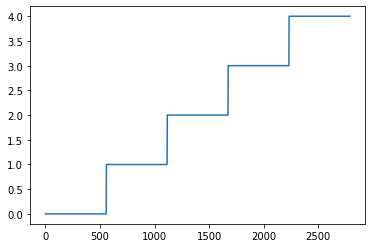

In [ ]:
plt.plot(lab) # labels are ordered

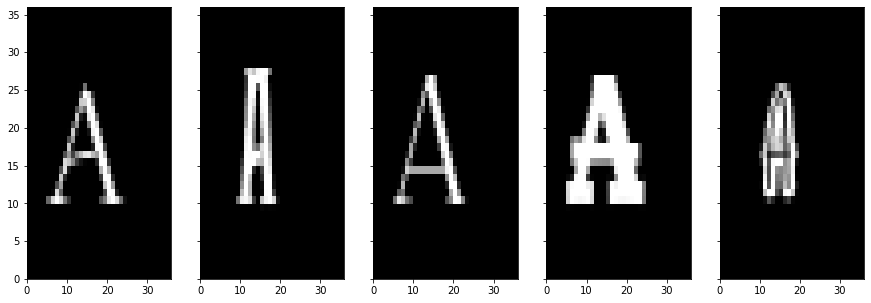

In [ ]:
# A subplot for each type font
fig, axs = plt.subplots(ncols = 5, sharey = True, figsize = (15, 5))
c = 90 # which character
for i in range(5):
  axs[i].pcolor(obs[c + i * 558], cmap = plt.cm.gray)

But this encoding is not good enough for the neural network that will have a softmax layer as its output layer. Therefore, its output will always be between one and zero (like probabilities).

We will be using a one-hot ecoding (OHE) which is simple and effective. 

- The result will be a matrix.
- The matrix will have as many rows as observations and as many columns as different labels.
- For the column that indicates its label, each row will take value 1.
- The rest of the matrix will be zeros.

In [ ]:
ohe = keras.utils.to_categorical(y = lab, num_classes = len(np.unique(lab)))
ohe[[500, 1000, 1500, 2000, 2500], :]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

There is an issue with the way the labels have been handed to us. They have been carefully laid out in order. This may be nice for a human to read but for a deep learning optimization method, it just prevents the algorithm from converging because it tries to do so with different labels in each batch.

From the point of view of the network, we are changing the cost function every once in a number of batches.

In [ ]:
# stir label values
np.random.RandomState(seed = 1)
idx = np.random.default_rng().permutation(lab.shape[0]) # random indexes
size = int(lab.shape[0] * .1)                           # size of sets
ivalid, itrain = idx[:size], idx[size:]
# split data into training and validation
valid, train = obs[ivalid, :], obs[itrain, :]   # observations
ohe_valid, ohe_train = ohe[ivalid], ohe[itrain] # labels

print('training shape:', train.shape, '\nvalidation shape:', valid.shape)
print('labels training shape:', ohe_train.shape, '\nlabels validation shape:', ohe_valid.shape)

training shape: (2511, 36, 36) 
validation shape: (279, 36, 36)
labels training shape: (2511, 5) 
labels validation shape: (279, 5)


Right now, the observations are images that are represented as matrices of pixels. But FFNN require its inputs to be vectors. So we need to reshape those matrices into vectors.

In [ ]:
valid = valid.reshape(valid.shape[0], -1)
train = train.reshape(train.shape[0], -1)

print('pixels per image: 36 x 36 =', 36 * 36)
print('training shape:', train.shape, '\nvalidation shape:', valid.shape)

pixels per image: 36 x 36 = 1296
training shape: (2511, 1296) 
validation shape: (279, 1296)


The core data structure in Keras is the model. Models are used to manage layers.
The construction of deep learning models in Keras is as follows:

1. **Define the model**. Create a sequence and add layers.
2. **Compile the model**. Specify loss functions and optimizers
3. **Fit the model**. Execute the model using data.
4. **Make predictions**. Use the model to generate predictions on new data.

The easiest way to build a model is to use the `Sequential` model. It allows to construct a linear stack of layers. For this type of model, every new layer is added *sequentially* with the `add()` method.

To create `Dense` layers it's just necessary to define the number of neurons. In this case, I've also indicated the activation function as the default is `None`. The first layer also needs to specify the dimensions of the input array.

Note that the softmax layer is specified as an activation function, which is accurate as it modifies a linear combination of inputs, like any other activation function.

As for compilation...

>  Compilation is an eficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU. Think of compilation as a precompute step for your network [3].

... two parameters needed for the optimization are required to be able to compile. This are

- the loss (cost) function
- the optimization algorithm

Additionally, among other things, you can specify metrics to be computed at each step of the training.

In [ ]:
ffnn = keras.models.Sequential()

ffnn.add(keras.layers.Dense(units = 512, activation = 'sigmoid', input_dim = train.shape[1]))
ffnn.add(keras.layers.Dense(units = ohe_train.shape[1], activation = 'softmax'))

ffnn.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc']) # accuracy

ffnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               664064    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 666,629
Trainable params: 666,629
Non-trainable params: 0
_________________________________________________________________


As mentioned, the parameters in a FFNN are the weights and bias of every neuron. The number of parameters for a layer can be calculated as

$$ n_{param} = n_{w} \times n_{x} + n_{b} = n_{out} \times ( n_{in} + 1) $$

where $n_{in}$ and $n_{out}$ are the number of input and output neurons for that particular layer.

As an example, for the input layer, the number of parameter is

In [ ]:
512 * (train.shape[1] + 1)

664064

At the training stage it's possible to specify a great deal of parameters. The most relevant ones are

- `x`. The training observations.
- `y`. The training labels
- `batch_size`. Number of samples per gradient update.
- `epochs`. Number of epochs to train the model.
- `validation_data`. A tuple `(x_val, y_val)` containing the data for validation.

It can be useful to save the `history` of the training.

In [ ]:
history = ffnn.fit(x = train, y = ohe_train, batch_size = 16, epochs = 25, validation_data = (valid, ohe_valid))

Epoch 1/25
157/157 [==============================] - 1s 5ms/step - loss: 1.5953 - acc: 0.2397 - val_loss: 1.4448 - val_acc: 0.4480
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 1.4329 - acc: 0.4340 - val_loss: 1.3185 - val_acc: 0.4588
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 1.3248 - acc: 0.4599 - val_loss: 1.2814 - val_acc: 0.4767
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 1.2412 - acc: 0.5173 - val_loss: 1.1966 - val_acc: 0.5054
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 1.1819 - acc: 0.5221 - val_loss: 1.1658 - val_acc: 0.4767
Epoch 6/25
157/157 [==============================] - 0s 2ms/step - loss: 1.1376 - acc: 0.5453 - val_loss: 1.1029 - val_acc: 0.5161
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 1.0842 - acc: 0.5670 - val_loss: 1.0834 - val_acc: 0.5125
Epoch 8/25
157/157 [==============================] - 0s 3ms/step - loss: 1.

Finally, the method `evaluate()` can be used to make predictions on new (or old) data. As per the results of the training, we can see that the model achieves a somewhat decent accuracy.

The `verbose` flag specifies the amount of feedback we want to receive from training. The default used before is `1` and it shows a progress bar as well as the metrics for each training epoch. Setting it to `0` denies feedback.

In [ ]:
loss, acc = ffnn.evaluate(x = train, y = ohe_train, batch_size = 16, verbose = 0)
print('training accuracy =', acc)
loss, acc = ffnn.evaluate(x = valid, y = ohe_valid, batch_size = 16, verbose = 0)
print('validation accuracy =', acc)

training accuracy = 0.6718438863754272
validation accuracy = 0.6057347655296326


To better understand the prediction process, the raw output of the output layer can be analyzed. Remember that the output layer uses a softmax layer so the raw outputs are the probabilities of belonging to each class. The class with the biggest probability will end up as the predicted class.

In [ ]:
prob = ffnn.predict(x = valid)

print('probabilities:\n', prob)
print('\nlabels:\n', ohe_valid)

probabilities:
 [[5.68736121e-02 4.39090997e-01 3.74343432e-02 2.86587328e-01
  1.80013776e-01]
 [5.23919821e-01 1.30926907e-01 2.49370635e-01 2.46376777e-03
  9.33188647e-02]
 [2.11820309e-03 9.46763232e-02 5.73290454e-04 8.70618999e-01
  3.20131555e-02]
 ...
 [3.32097113e-02 4.50236768e-01 2.82152928e-02 1.85267404e-02
  4.69811589e-01]
 [3.59353840e-01 2.89639443e-01 1.40219167e-01 3.21365544e-03
  2.07573876e-01]
 [3.13024729e-01 3.67668629e-01 1.28801733e-01 6.85722679e-02
  1.21932656e-01]]

labels:
 [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


One of the most useful pieces of information we can get is the saved `history` of the training, it allows us to analyzed the metrics throught the optimization process.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


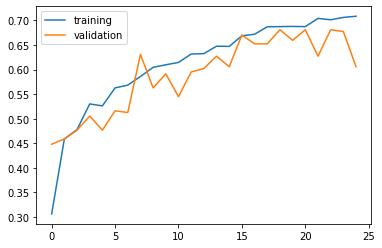

In [ ]:
plt.plot(history.history['acc'], label = 'training')
plt.plot(history.history['val_acc'], label = 'validation')
plt.legend()

Looking at the evolution of the model, the learning curve, it seems that it could've used a few more epochs for training, since accuracy was still increasing.

Overall, the design of a machine learning model usually uses cross-validation to try out different combinations of hyperparameters that we feel are reasonable or cover the majority of places were the optimal combination may be.

Because in deep learning that is costly, I will try to improve the performance of the model changing the hyperparameters based on the hypothesis that the model is underfitting and that it can achieve a greater level of accuracy.

In [ ]:
from keras.layers import Dense, Dropout

ffnn = keras.Sequential()

ffnn.add(Dense(units = train.shape[1], activation = 'relu', input_dim = train.shape[1]))
ffnn.add(Dense(units = 256, activation = 'relu'))
ffnn.add(Dropout(rate = .3))
ffnn.add(Dense(units = 32, activation = 'sigmoid'))
ffnn.add(Dropout(rate = .2))
ffnn.add(Dense(units = ohe_valid.shape[1], activation = 'softmax'))
ffnn.output.shape

TensorShape([None, 5])

We can tell the new model is slightly more complex since the number of parameters is far larger. That's the reason we have also added some `Dropout` layers. Notice that these layers do not have any parameters. Their sole function is to randomly prevent the activation of neurons.

In [ ]:
ffnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1296)              1680912   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               332032    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 2,021,333
Trainable params: 2,021,333
Non-trainable params: 0
____________________________________________

For the compilation, we have modified the `optimizer`. It's still the same *Stochastic Gradient Descent* (SDG), but there are a number of differences:

- the learning rate (step size) has increased to speed up the search,

- the use of momentum has been added to further accelerate the gradient descent (in the relevant directions) and to dampen the oscilations and

- it has been indicated to use Nesterov momentum.

SDG it's a special type of optimization algorithm that only uses one sample before it updates the parameters according to the gradient descent direction.

The `loss` function remains the same as it's one befitting a classification problem and the no new `metrics` have been added to assess performance.

In [ ]:
ffnn.compile(
    optimizer = keras.optimizers.SGD(learning_rate = .1, momentum = .7, nesterov = True),
    loss = 'categorical_crossentropy', metrics = ['acc']
)
history = ffnn.fit(x = train, y = ohe_train, batch_size = 64, epochs = 75, validation_data = (valid, ohe_valid))

Epoch 1/75
40/40 [==============================] - 1s 8ms/step - loss: 1.6461 - acc: 0.2695 - val_loss: 1.2070 - val_acc: 0.5125
Epoch 2/75
40/40 [==============================] - 0s 4ms/step - loss: 1.1449 - acc: 0.5610 - val_loss: 0.9485 - val_acc: 0.6344
Epoch 3/75
40/40 [==============================] - 0s 4ms/step - loss: 0.8573 - acc: 0.6493 - val_loss: 0.7292 - val_acc: 0.6810
Epoch 4/75
40/40 [==============================] - 0s 4ms/step - loss: 0.7082 - acc: 0.7077 - val_loss: 0.6198 - val_acc: 0.7849
Epoch 5/75
40/40 [==============================] - 0s 4ms/step - loss: 0.5512 - acc: 0.7836 - val_loss: 0.5700 - val_acc: 0.7957
Epoch 6/75
40/40 [==============================] - 0s 4ms/step - loss: 0.4681 - acc: 0.8322 - val_loss: 0.4981 - val_acc: 0.8029
Epoch 7/75
40/40 [==============================] - 0s 4ms/step - loss: 0.3456 - acc: 0.8836 - val_loss: 0.5474 - val_acc: 0.8065
Epoch 8/75
40/40 [==============================] - 0s 4ms/step - loss: 0.3003 - acc: 0.90

For the training, the number of epochs has increased, as well as the batch size. A bigger number of epochs will usually improve the efficiency **on the training data** as it gives the algorihtm more time to converge.

Sure enough, the results show that final accuracy it's perfect. 100%! It's much better than last time for the validation set too.

In [ ]:
loss, acc = ffnn.evaluate(x = train, y = ohe_train, batch_size = 64, verbose = 0)
print('training accuracy =', acc)
loss, acc = ffnn.evaluate(x = valid, y = ohe_valid, batch_size = 64, verbose = 0)
print('validation accuracy =', acc)

training accuracy = 1.0
validation accuracy = 0.8960573673248291


Checking out the history of training, it's obvious that we could've used less epochs and saved time training because the learning curve had graded long before the end. 
But, at the same time, the only thing we would have saved it's time. It could have happened that the model starts to overly adapt to the training samples and fails to predict the validation ones. Since overfitting barely happened (the cross-entropy rises slowly at the end), the model it's ready to be used.

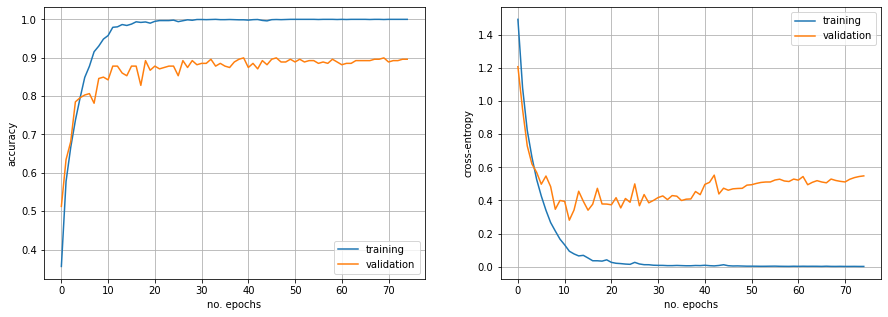

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
ax1.plot(history.history['acc'], label = 'training')
ax1.plot(history.history['val_acc'], label = 'validation')
ax2.plot(history.history['loss'], label = 'training')
ax2.plot(history.history['val_loss'], label = 'validation')
ax1.legend()
ax2.legend()
ax1.set_xlabel('no. epochs')
ax2.set_xlabel('no. epochs')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('cross-entropy')
ax1.grid()
ax2.grid()

For classification tasks, a common representation of the errors is the *confusion matrix*. It holds a lot of information in very little space. Not only error but correctly placed predictions are showed too.

For example, in this case, we see that the highest number of errors come from mistaking class 1 with 3. And if we go back to the representations of each font, we will see that fonts 1 and 3 are the most alike of the five.

Confusion Matrix:
 [[44  1  8  0  0]
 [ 1 36  4  2  2]
 [ 5  1 66  0  0]
 [ 0  0  0 57  2]
 [ 0  2  0  1 47]]


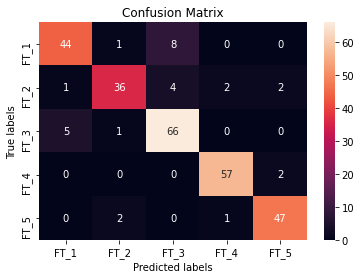

In [ ]:
from sklearn.metrics import confusion_matrix as cm

prob = ffnn.predict(x = valid) # new model, new probabilities
cm = cm(y_true = np.argmax(ohe_valid, axis = 1), y_pred = np.argmax(prob, axis = 1))
print('Confusion Matrix:\n', cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax) # annot = True; to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

What it's always lost in the hunt for accuracy is *interpretability*. There is a well known tradeoff between the two. 
And since neural networks are one the most complex models able to achieve the better accuracies, their interpretability is very elusive.

Here, in an attempt to visualize what is going on inside the model, we will look into the first layer, that interacts directly with the images. We will plot the weights of that layer in an image-like manner to be able to identify where each neuron places importance within an image. One image per neuron.

In [ ]:
# already numpy arrays
kernel = ffnn.layers[0].get_weights()[0] # weights
bias = ffnn.layers[0].get_weights()[1]
print('kernel shape:', kernel.shape, '\tbias shape:', bias.shape)

kernel shape: (1296, 1296) 	bias shape: (1296,)


There are some clear patterns on the weights of the neurons. This means that those neurons look for things on specific areas of the image. 
On the other hand, there are other images that don't show any clear patterns. We can either think of those images as general purpose neurons or, more likely, the interpretation of their patterns is dependant on the rest of the layers and is not meaningful on their own.

The higher weights are shown in yellow while the weights near zero have a bluish tone. Therefore places in yellow will produce a large output when they encounter high input values (from the input images), while the lower bound weights won't produce significant values nevermind the input. 

The mentioned patterns can either be a certain are showing a yellow tone, a place where there might be some relevant features for a specific font type; the opposite (a blue tone), a place that must not be activated if we are looking for a certain typeface; or a combination of both.

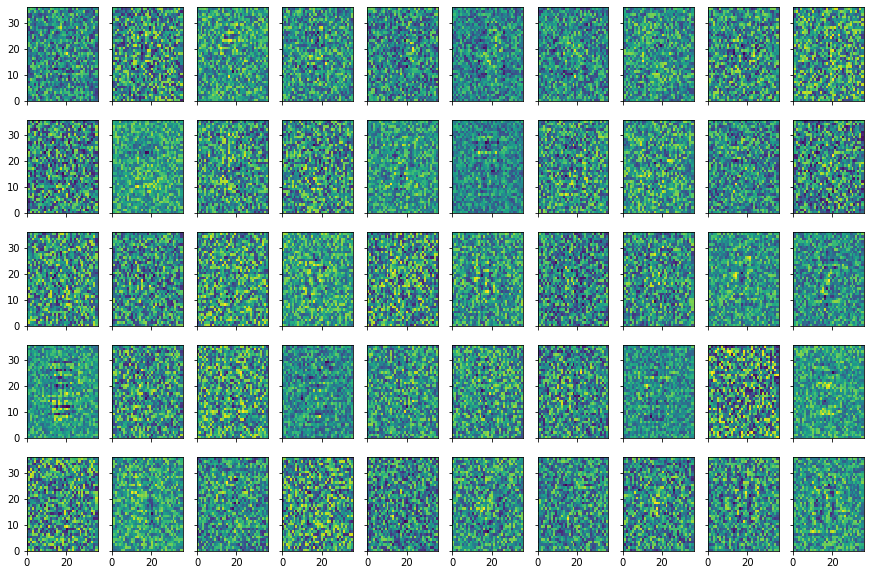

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 10, sharex = 'col', sharey = 'row', figsize = (15, 10))
for i in range(50):
  axs[i // 10, i % 10].pcolor(kernel[:, i].reshape(36, 36))

Note that this method does not take into account the importance of the bias, nor the activation function. There more more advanced techniques that consider these features and much more [4][5].

# Convolutional Neural Networks

The same way FFNN work on vectors, *Convolutional Neural Networks* (CNN) are designed to work with matrices. Initially, they were thought for processing images, but any type of input that can be converted to a two-dimensional space is liable to be modelled by a CNN.

The CNN's structure search is based on the human cognitive visual system. The brain is able to recognize features on a local scale as on a global scale. The model generates *subimages* of the original matrix applying a different *filters* to the original matrix.

## Architecture

The general architecture can be split into two clearly distinct stages:

- **feature extraction**. It is based on moving across the matrix input and analyzing it around different points. As the name suggests, this is done through *convolution*.

- **prediction**. Uses a FFNN to use the transformed features obtained in the previous step.

<img src="https://lh3.googleusercontent.com/yrHzday2CwSYLkXf9yKSoH-BpjqnnAuyiMvPAS5yS3-lFnl5jwkR6FoT_v2Vbi14s414fJSORuGLRQbHyYp6dtHDItRcSQnRWcd1JRGbZC5VlGTvH80gFZrHw8qg2Tx7ca2HYKFc" height="400"/>

### Convolution layer

The key feature of CNN is that they are tailored for dealing with matrix-like inputs. This is handled by the *convolution* layers.

Convolution layers apply their own matrix of weights to the input matrix, centering the window of weights around different points to cover the whole input matrix. The operation performed at each point is a convolution. Therefore, the result at each point is a scalar, and the result after convoluting the entire matrix is another matrix, smaller in size.

Different convolution windows can be considered as different filters. Each layer usually has more than one of these windows so they are equivalent to neurons in the sense that they form a connnected layered network. This also means that the output of these layers is usually a 3D tensor.

### Pooling layer

The operations in CNN involve more computations than regular FFNN. A way to speed up the optimization of the model is to reduce the size of the layers. *pooling* layers offer a simple equivalent alternative. They divide the output of the previous layers in submatrices and compute a statistic for each of those submatrices.

In the CNN architecture is habitual for convolution and pooling layers to come in pairs. It's expected that pooling layers stress the more important information inside a convolution layer. That is why one of the most popular form of pooling layers computes the maximum value inside the submatrices. It's called *max pooling* layer.

### Flatten layer

There is a need for a layer that connects the proper CNN phase (feature extraction) with the next dense layers. 
That layer is the *flatten* layer. It is a very simple layer that just needs to reshape the content of the last layer of the feature extraction stage so that it can be used by a FFNN to perform prediction.
It transforms a 3D array input into a 1D array output.

## Hyperparameters

In addition to the standard hyperparameters of neural networks, CNN add

- window size (equivalent to number of neurons per layer)
- stride
- padding

Stride and padding affect the way the convolution window moves in convolution layers. While the size of the stride measures the amount of evaluations executed and thus the speed of the window, the padding refers to the edges of the input matrix. Zero-padding can be performed around the border of the matrix to allow for more points to be evaluated at the edges. Since convolution at the end of the day is just a combination of products and sums, the zeros won't affect the final result of the convolution.

## Example
We will recycle the typeface classification problem to compare the performance of CNN and FFNN.

In [ ]:
# convolutional networks apply to three-dimensional tensors
train = train.reshape(-1 , obs.shape[1], obs.shape[2], 1)
valid = valid.reshape(-1 , obs.shape[1], obs.shape[2], 1)

print('training dimensions:', train.shape , '\nvalidation dimensions:', valid.shape)

training dimensions: (2511, 36, 36, 1) 
validation dimensions: (279, 36, 36, 1)


The model is defined in a similar manner as we are still using Keras. The `kernel_size` argument in convolution layers designates the window size. Also, the ReLU activation function is widely used in these models.

Note that we are using 2D convolution layers because we are dealing with images but the convolution operation can be applied in other dimensions.

In [ ]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

cnn = keras.Sequential()
# feature extraction
# input: 36x36 images with 1 channel -> (36, 36) tensors.
cnn.add(Conv2D(
    filters = 16, kernel_size = (3, 3), activation = 'relu', 
    input_shape = (train.shape[1], train.shape[2], 1))
)
cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(rate = 0.25))
# prediction
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(ohe_train.shape[1], activation = 'softmax'))
cnn.output.shape

TensorShape([None, 5])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 34, 34, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

I have changed the optimization parameters for SGD a little to adapt them to the needs of the new architecture.
But the training options will be copied from the last model, which seemed to have worked well. Besides, it's important when comparing having as less variables as possible.

In [ ]:
cnn.compile(
    optimizer = keras.optimizers.SGD(learning_rate = .05, momentum = .5, nesterov = True),
    loss = 'categorical_crossentropy', metrics = ['acc']
)
history = cnn.fit(x = train, y = ohe_train, batch_size = 64, epochs = 75, validation_data = (valid, ohe_valid))

Epoch 1/75
40/40 [==============================] - 3s 12ms/step - loss: 1.4336 - acc: 0.3529 - val_loss: 1.5261 - val_acc: 0.2258
Epoch 2/75
40/40 [==============================] - 0s 10ms/step - loss: 1.1645 - acc: 0.5226 - val_loss: 1.4113 - val_acc: 0.4194
Epoch 3/75
40/40 [==============================] - 0s 6ms/step - loss: 1.1834 - acc: 0.5517 - val_loss: 0.8368 - val_acc: 0.5771
Epoch 4/75
40/40 [==============================] - 0s 5ms/step - loss: 0.6760 - acc: 0.6994 - val_loss: 1.2361 - val_acc: 0.5161
Epoch 5/75
40/40 [==============================] - 0s 5ms/step - loss: 1.1117 - acc: 0.5969 - val_loss: 0.8968 - val_acc: 0.6667
Epoch 6/75
40/40 [==============================] - 0s 5ms/step - loss: 0.8876 - acc: 0.6790 - val_loss: 0.6578 - val_acc: 0.7240
Epoch 7/75
40/40 [==============================] - 0s 6ms/step - loss: 0.4694 - acc: 0.8285 - val_loss: 0.7099 - val_acc: 0.6918
Epoch 8/75
40/40 [==============================] - 0s 6ms/step - loss: 1.1208 - acc: 0.

After evaluating the model on the data we can see clear improvements. Although the training accuracy it's the same (it couldn't improve), the accuracy displayed on the validation set has taken a big leap. Therefore, the CNN model decreases the error associated with variance and thus overfitting.

In [ ]:
loss, acc = cnn.evaluate(x = train, y = ohe_train, batch_size = 64, verbose = 0)
print('training accuracy =', acc)
loss, acc = cnn.evaluate(x = valid, y = ohe_valid, batch_size = 64, verbose = 0)
print('validation accuracy =', acc)

training accuracy = 1.0
validation accuracy = 0.9784946441650391


The learning curves have a similar shape to the FFNN case. The model seems to stabilize around the $20^{th}$ epoch, although it isn't completely level this time. 
There is probably a better choice of configuration parameters for the optimizer that can smooth the convergence. This time there isn't a trace of overfitting increasing during the whole process though.

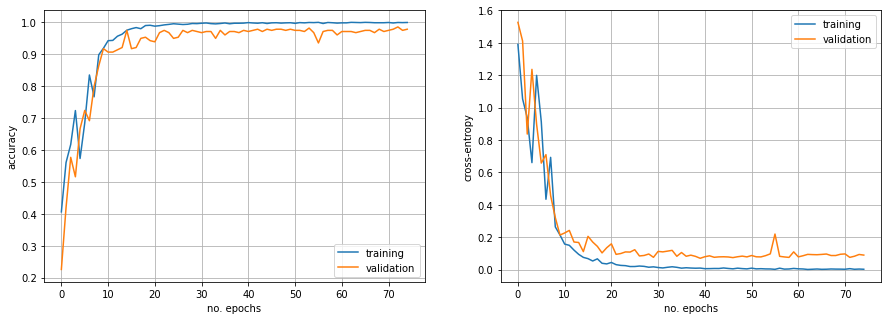

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
ax1.plot(history.history['acc'], label = 'training')
ax1.plot(history.history['val_acc'], label = 'validation')
ax2.plot(history.history['loss'], label = 'training')
ax2.plot(history.history['val_loss'], label = 'validation')
ax1.legend()
ax2.legend()
ax1.set_xlabel('no. epochs')
ax2.set_xlabel('no. epochs')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('cross-entropy')
ax1.grid()
ax2.grid()

Since there is only a couple of errors, there is no point in displaying the confusion matrix.
We can safely conclude that CNN performed better. This was expected as we are dealing with images in this problem and CNN excels in this regard.

At this moment our model performs pretty well, nailing most of the predictions. But it's a reasonable thing to question and aim for better. Can we further improve this model to **always** guess the correct answer?

The issue with the problem at hand is that the number of observations is limited. There is a fixed number of characters in the language and it cannot be increased. This only leaves us one alternative: to use transfer learning.

The chosen model has been the VGG with 16 layers [6], which is one of the pre-trained models availabel in Keras and it's also a CNN. It was trained and used for image recognition so it proves useful for our task.

The VGG model was trained using $224 \times 224$ pixels RGB images. So we need to `reshape` our samples to have the dimensions expected by the model.

In [ ]:
print('training dimensions:', train.shape , '\nvalidation dimensions:', valid.shape)

training dimensions: (2511, 36, 36, 1) 
validation dimensions: (279, 36, 36, 1)


In [ ]:
from skimage.transform import resize
from skimage.color import gray2rgb

# convert images to 2D arrays
train_img, valid_img = train.reshape(-1, train.shape[1], train.shape[2]), valid.reshape(-1, valid.shape[1], valid.shape[2])
# RGB images have 3 channels (one for each color)
h, v = 224, 224
train = np.zeros(shape = (train_img.shape[0], h, v, 3))
valid = np.zeros(shape = (valid_img.shape[0], h, v, 3))

for i, img in enumerate(train_img):
  image = gray2rgb(image = img)
  train[i] = resize(image = image, output_shape = (h, v, 3))
for i, img in enumerate(valid_img):
  image = gray2rgb(image = img)
  valid[i] = resize(image = image, output_shape = (h, v, 3))

print('train images :', train_img.shape , '\tvalidation images :', valid_img.shape)
print('train data :', train.shape , '\tvalidation data :', valid.shape)

train images : (2511, 36, 36) 	validation images : (279, 36, 36)
train data : (2511, 224, 224, 3) 	validation data : (279, 224, 224, 3)


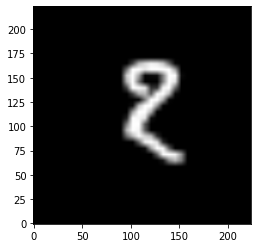

In [ ]:
plt.imshow(train[0,:], origin = 'lower')

The **VGG16** is a fairly simple model. Although it's more complex that the simple models that have been used in this playground example, it can't be compared to state of the art models for image recognition. Nevertheless, it has been trained with a lot of data and for this simple task a simple model probably will suffice. 
By default, Keras loads weights pre-trained on the [ImageNet](http://www.image-net.org/) challenge.

In [ ]:
keras.applications.VGG16().summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Note that the goal is to use only the feature extraction block, so the three last layers need to be replaced by our own specifically trained networks.

Keras provides two options to do that

- it's always possible to manage a model's layers. To remove the last layer, the `pop()` method is available as `model._layers.pop()`.
- the `include_top` argument from the `VGG16()` method. It is logical argument indicating whether the last three fully-connected layers at the top of the network should be included.

Note that when working with `include_top = false` we are forced to specify our own `input_shape` and could have skipped the image preprocessing step.

In [ ]:
# need to specify shape again when working with
vgg = keras.applications.VGG16(include_top = False, input_shape = (h, v, 3))
vgg.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

To be able to build more complex models than simple `Sequential` models, we need to use the Keras API. To define a layer using the API, it needs to follow the sintax `layer = Type(*args, **kwargs)(<previous_layer>)`. Afterwards, we just need to specify the beginning and end of the model.

In [ ]:
# add layers
x = Flatten()(vgg.layers[-1].output) # output of the last layer of VGG
x = Dropout(rate = .5)(x)
x = Dense(units = 256, activation = 'relu')(x)
out = Dense(units = ohe_train.shape[1], activation = 'softmax')(x)
# build model
tl = keras.models.Model(inputs = vgg.input, outputs = out)

It's better to *freeze* the training on the layers belonging to the VGG16 model. The next code makes sure that the pre-trained bottom layers are not trainable.

In [ ]:
for layer in vgg.layers:
  layer.trainable = False
for i in range(1, len(tl.layers)):
  print('is layer', i, 'trainable?', tl.layers[i].trainable)

is layer 1 trainable? False
is layer 2 trainable? False
is layer 3 trainable? False
is layer 4 trainable? False
is layer 5 trainable? False
is layer 6 trainable? False
is layer 7 trainable? False
is layer 8 trainable? False
is layer 9 trainable? False
is layer 10 trainable? False
is layer 11 trainable? False
is layer 12 trainable? False
is layer 13 trainable? False
is layer 14 trainable? False
is layer 15 trainable? False
is layer 16 trainable? False
is layer 17 trainable? False
is layer 18 trainable? False
is layer 19 trainable? True
is layer 20 trainable? True
is layer 21 trainable? True
is layer 22 trainable? True


At the summary of a model, along with the information of every layer, it's possible to see at the end the number of trainable parameters.

In [ ]:
tl.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Although the definition of the model has been slightly different, the compilation and fitting procedures are defined the same way.

I've changed the optimizer because I wasn't getting good results with the last setting. The default behaviour is `optimizer='rmsprop'`. So, it's the RMSprop optimization algorithm with its default behaviour.

In [ ]:
tl.compile(loss = 'categorical_crossentropy', metrics = ['acc'])
history = tl.fit(x = train, y = ohe_train, batch_size = 64, epochs = 75, validation_data = (valid, ohe_valid))

Epoch 1/75
40/40 [==============================] - 14s 290ms/step - loss: 6.1253 - acc: 0.4143 - val_loss: 1.4526 - val_acc: 0.5197
Epoch 2/75
40/40 [==============================] - 10s 239ms/step - loss: 0.7409 - acc: 0.7475 - val_loss: 0.3457 - val_acc: 0.8530
Epoch 3/75
40/40 [==============================] - 10s 239ms/step - loss: 0.4205 - acc: 0.8435 - val_loss: 0.3954 - val_acc: 0.8315
Epoch 4/75
40/40 [==============================] - 10s 242ms/step - loss: 0.3716 - acc: 0.8576 - val_loss: 0.2041 - val_acc: 0.9140
Epoch 5/75
40/40 [==============================] - 10s 242ms/step - loss: 0.1621 - acc: 0.9397 - val_loss: 0.9478 - val_acc: 0.7921
Epoch 6/75
40/40 [==============================] - 10s 244ms/step - loss: 0.2240 - acc: 0.9434 - val_loss: 0.0730 - val_acc: 0.9785
Epoch 7/75
40/40 [==============================] - 10s 245ms/step - loss: 0.1470 - acc: 0.9446 - val_loss: 0.0604 - val_acc: 0.9821
Epoch 8/75
40/40 [==============================] - 10s 245ms/step - 

The results speak for themselves. Both results are nearly perfect.

Note that as the accuracy increases it's also increasingly difficult to improve it. It doesn't have the same value a 5% increase at 50% accuracy and at 95%. 

In [ ]:
loss, acc = tl.evaluate(x = train, y = ohe_train, batch_size = 64, verbose = 0)
print('training accuracy =', acc)
loss, acc = tl.evaluate(x = valid, y = ohe_valid, batch_size = 64, verbose = 0)
print('validation accuracy =', acc)

training accuracy = 1.0
validation accuracy = 1.0


A noteworthy aspect of the training is that it takes the model more epochs to stabilize around the unit accuracy. This is probably caused by the more complex architecture the new model has. But becaused the optimizer employed has also changed we can't be too sure.

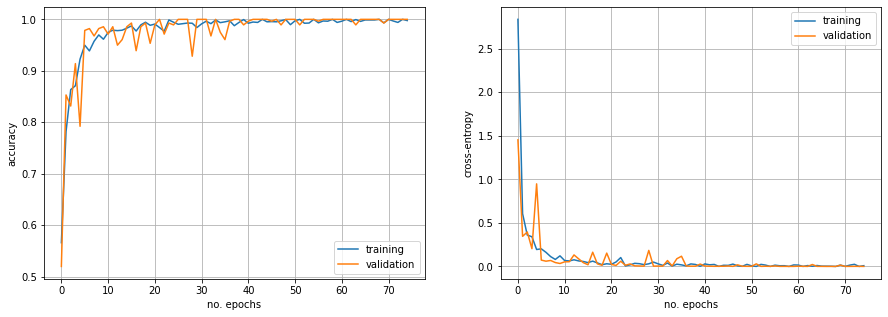

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
ax1.plot(history.history['acc'], label = 'training')
ax1.plot(history.history['val_acc'], label = 'validation')
ax2.plot(history.history['loss'], label = 'training')
ax2.plot(history.history['val_loss'], label = 'validation')
ax1.legend()
ax2.legend()
ax1.set_xlabel('no. epochs')
ax2.set_xlabel('no. epochs')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('cross-entropy')
ax1.grid()
ax2.grid()

If we take a look at the raw output of the last softmax layer, we will see that the probabilities are much more one-sided now, compared to our first example.

This difference can be blamed on the the more powerful model and it can be interpreted as the assurance in each prediction increasing.

In [ ]:
prob = tl.predict(x = valid)

print('probabilities:\n', prob)
print('\nlabels:\n', ohe_valid)

probabilities:
 [[6.3030242e-31 5.6287048e-21 8.7306923e-20 8.2892530e-37 1.0000000e+00]
 [3.1020289e-09 3.0541548e-11 1.0000000e+00 8.4686064e-11 8.4079537e-13]
 [3.7286754e-12 8.9313259e-09 6.9462324e-20 1.0000000e+00 1.6042783e-25]
 ...
 [5.3798264e-21 1.0000000e+00 2.4880265e-18 1.0847162e-14 7.2545506e-14]
 [1.1718269e-18 9.5654249e-09 1.3481091e-21 3.7687210e-24 1.0000000e+00]
 [1.4869446e-10 1.0000000e+00 1.9382946e-14 6.9099543e-10 2.0641986e-13]]

labels:
 [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [ ]:
print('average probability of prediction is', np.mean( np.max(prob, axis = 1) ))

average probability of prediction is 0.99951565


# Recurrent Neural Networks

A widely relevant topic throughout modelling history has always been sequences. A lot of prediction problems come in the shape of a sequence. Before the appearance of deep learning, Markov networks were the leaders of this field, but *Recurrent Neural Networks* (RNN) quickly took that place.

Unlike Markov chains, RNN don't have explicitly defined states, but they do make use of the last state $\mathbf{s}_{t-1}$ to manage the present state $\mathbf{s}_t$.

## Architecture

Taking away the recurent behaviour of RNN, their architecture is fairly similar to that of FFNN. The basic learning unit is called *cell*. It has as input the state of the previous layer and their output is their state. 
Data in the strict sense of the word is not necessary as the network models states. An algebraic definition I like of a RNN cell is

$$ \begin{pmatrix} \mathbf{s}_t \\ \mathbf{y}_t \end{pmatrix} =  f \begin{pmatrix} \mathbf{s}_{t-1} \\ \mathbf{x}_t \end{pmatrix} $$

where $x_t$ and $y_t$ are optional (possibly empty) terms representing the input and output respectively. Another important thing to note is that all elements above are vectors although the notation is different because it has been copied from [7].

The definition of a cell is in between that of a neuron and a layer. A RNN layer has various cells each of them sharing the same weights.

![](https://r2rt.com/static/images/NH_VanillaRNNcell.png)

That simple definition can be extended to 

$$ \mathbf{s}_t = h( \mathbf{W}_s \mathbf{s}_{t-1} + \mathbf{W}_x \mathbf{x}_t + b ) $$

where the matrix of weights has been divided into the weights for the states and the weights for the inputs $\mathbf{W} = \begin{pmatrix} \mathbf{W}_s \\ \mathbf{W}_x \end{pmatrix}$. Also, the output for each cell may need further processing. That transformation may consist on a softmax layer or a whole FFNN. Regardless, it can be expressed as $\mathbf{y}_t = f(\mathbf{s}_t)$.

## Backpropagation

The expressions for (time) backpropagation are very similar (at least conceptually).

$$ 
\frac{\partial E_t}{\partial s_{t-m}} =
\frac{\partial E_t}{\partial y_t} 
\frac{\partial y_t}{\partial s_t}
\frac{\partial s_t}{\partial s_{t-1}}
\frac{\partial s_{t-1}}{\partial s_{t-2}} \cdots
\frac{\partial s_{n-m+1}}{\partial s_{n-m}}
$$

where the expressions have been simplified even further to avoid explictly showing the effect of the activation function. Also, each variable's definition can be found above.

Nevertheless, there was a problem with RNN's optimization. Because cells share the same weights, gradients computed through backpropagation proved to be prone to either increase or diminish exponentially. This tendencies were emphasized the more cells the layer had. Ultimately, this means that RNN are **not capable of learning long term dependencies**.

## Long Short-Term Memory Networks

The *exploding* and *vaninshing gradients* problem was first solved by the *Long Short-Term Memory Networks* (LSTMN). In a nutshell, LSTMN cells can keep information from previous states unaltered. 

More specifically, they can choose when the state is worthy of being updated and how much so. Information can be
- forgotten,
- updated and
- kept

Those decisions are made through a set of doors controlled by sigmoid activation functions, $\sigma(·)$. Remember that their output ranges between one and zero. Another change is the state and the output now are the same. Although for classification tasks a softmax layer is still necessary.

Of course these new features come at the cost of a much more complex architecture at cell level and much bigger computational cost.

![](https://www.researchgate.net/profile/Sergio_Guadarrama/publication/319770438/figure/fig1/AS:613925582303265@1523382673457/A-diagram-of-a-basic-RNN-cell-left-and-an-LSTM-memory-cell-right-used-in-this-paper.png)

Note that in the picture the state's notation has changed this way

$$ s_t \rightarrow h_t \\ y_t \rightarrow z_t $$

## Example

The problem this time is a little bit more ambitious. It's based on *Natural Language Processing* (NPL). NPL is a big area of study and application of deep learning techniques. Specially, RNN and derivatives are very useful because it allows to model sequences of words.

The task will be text generation.

In [ ]:
path_to_file = keras.utils.get_file('wonderland.txt', 'https://www.gutenberg.org/files/11/11-0.txt')
text = open(path_to_file).read()

The chosen dataset is the book *Alice's Adventures in Wonderland* by Lewis Carroll. Available at [Project Gutenberg](https://www.gutenberg.org/).

Let's take a quick look into it.

In [ ]:
print(text[:870]) # take a look at the first characters in the text
text = text[870:] # remove beginning

﻿The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]





In [ ]:
print(text[:750]) # again



Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book h


In [ ]:
# length of text is the number of characters in it
print('length of text: {} characters'.format(len(text)))
# the unique characters in the file
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))

length of text: 163540 characters
89 unique characters


In this example, the coding will be done on characters, because it's easier to process letters than words. Sometimes this coding is said to *vectorize* the text.

Anyhow, we need two Python's dictionaries to be able to map text to numbers and vice versa.

In [ ]:
# creating a mapping from unique characters to integers
char2int = {u:i for i, u in enumerate(vocab)}
int2char = np.array(vocab)
# convert the whole text to a numeric vector
text_as_int = np.array([char2int[c] for c in text]) 

Notice that we still have a lot of characters mapped that maybe are not within the ones we expect to model (letters). There is plenty of room for improvement in the preprocessing stage.

Nevertheless, we now have two lookup tables and an integer representation for each character.

In [ ]:
print('{')
for char,_ in zip(char2int, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2int[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '$' :   4,
  '%' :   5,
  "'" :   6,
  '(' :   7,
  ')' :   8,
  '*' :   9,
  ',' :  10,
  '-' :  11,
  '.' :  12,
  '/' :  13,
  '0' :  14,
  '1' :  15,
  '2' :  16,
  '3' :  17,
  '4' :  18,
  '5' :  19,
  ...
}


In [ ]:
print('{} ---- characters mapped to int ---- > {}'.format(repr(text[:20]), text_as_int[:20]))

'\n\nAlice’s Adventures' ---- characters mapped to int ---- > [ 0  0 28 68 65 59 61 86 75  1 28 60 78 61 70 76 77 74 61 75]


The prediction task is classification again this time. It can be described as

> Given a character, or a sequence of characters, what is the most probable next character? [8]

Remember RNN model sequences by mantaining an actual internal state that depends on the previously seen data. In NLP, these models are called *$n$-grams* being $n - 1$ the number of previous elements considered.

So, to answer the question, we need to feed the model with sequences of fixed length. The labels will have length one and will be the next characters in line.

In [ ]:
# n-gram
seq_length = 250
examples_per_epoch = len(text) - seq_length

# divide the text in sequences
sequences = np.empty(shape = (examples_per_epoch, seq_length + 1), dtype = 'int64')
for idx in range(examples_per_epoch):
  sequences[idx] = text_as_int[idx:(idx + seq_length + 1)]

# create training examples / targets
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[-1]
  return input_text, target_text

x = np.empty(shape = (examples_per_epoch, seq_length), dtype = 'int64')
labels = np.empty(shape = examples_per_epoch, dtype = 'int64')
for i, seq in enumerate(sequences):
  data, label = split_input_target(seq)
  x[i] = data
  labels[i] = label

print('data have dimensions', x.shape)
print('labels have dimensions', labels.shape)

data have dimensions (163290, 250)
labels have dimensions (163290,)


In [ ]:
N = 1000
print('input data: ', repr(''.join(int2char[x[N]])))
print('target data:', repr(''.join(int2char[labels[N]])))

input data:  'y sleepy and stupid), whether the pleasure of\nmaking a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so _very_ remarkable in that; nor di'
target data: 'd'


There are mainly two ways to vectorize text:

- OHE. It has already been used. It can be summarized as asign a different variable for each element, characters in this case. They generate vectors that are:
  + sparse (contain mostly zeros)
  + high-dimensional
  + hard-coded

- *Embedding*. It consists of generating a low-dimensional space to represent each element (coded beforehand). It generates a matrix composed of vectors that are
  + dense
  + low-dimensional (at least lower than OHE)
  + learned (from the data)

Up until now, we have used OHE to code our data. But embeddings are better suited to handle NLP tasks that have a lot of different elements. 
Furthermore, the learned vector spaces have demonstrated to acquire some attractive characteristics for modelling languages. They are described by a matrix of weights that are update through gradient descent, just like any other layer.

Nevertheless, the output of the model will be a softmax layer whose output are the probabilities for the next element. Therefore, although the inputs are managed through embedding, the outputs have   a format befitting OHE.

In [ ]:
y = keras.utils.to_categorical(y = labels, num_classes = len(vocab))
print('categorical labels have shape', y.shape)

categorical labels have shape (163290, 89)


We have already prepared the data to enter an `Embedding` layer. All it's left is to build the model. Instead of the `input_shape` argument we have been using, for the first layer we'll use the `input_length` argument that gives the length of the soon-to-be embedded vectors.

In [ ]:
from keras.layers import Embedding, LSTM, Dense

rnn = keras.models.Sequential()

rnn.add(Embedding(input_dim = len(vocab), output_dim = 256, input_length = seq_length))
rnn.add(LSTM(units = 1024, dropout = .25))
rnn.add(Dense(units = len(vocab), activation = 'softmax'))

print('expected input:', rnn.input.shape)
print('expected output:', rnn.output.shape)

expected input: (None, 250)
expected output: (None, 89)


If we'd decided to use OHE, a reshape of the inputs may thave been necessary, but the `Embedding` layer returns a 3D tensor, of shape `(samples, sequence_length, embedding_dimensionality)` from a 2D input.
And that is the input the `LSTM` layer is expecting.

In [ ]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 256)          22784     
_________________________________________________________________
lstm (LSTM)                  (None, 1024)              5246976   
_________________________________________________________________
dense_10 (Dense)             (None, 89)                91225     
Total params: 5,360,985
Trainable params: 5,360,985
Non-trainable params: 0
_________________________________________________________________


This fabricated example is meant to check that the model has the behaviour we are expecting:
- the model returns, for each sample in the batch, a vector of probabilities with lenght that of the vocabulary (number of characters in this case).
- the probabilities attached to each character indicate the likeliness of that character being the next given an input sequence.
- the untrained weights are drawn from a probability distribution, so the probabilities do not need to make any sense. In fact, af first they try to give a similar chance to every character.

89 probabilities
the sum of probabilities adds up to  1.0 



Text(0, 0.5, 'probability')

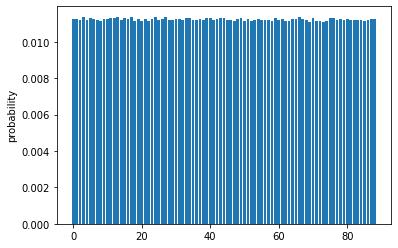

In [ ]:
input_array = np.random.randint(len(vocab), size=(1, seq_length))
output_array = rnn.predict(input_array)
print(output_array.shape[1], 'probabilities')

print('the sum of probabilities adds up to ', np.round(np.sum(output_array), decimals = 3), '\n')
plt.bar(x = range(len(vocab)), height = output_array[0])
plt.ylabel('probability')

Here, we ilustrate the use of callbacks in Keras, with an example that saves the weights of our model at the end of an epoch **only** if the cost function reaches an all-time low.

Most of the time, it's interesting to save them for future use. An option for user's working on Google's Colaboratory is to mount their Google Drive's directory in the Colab machine with the next chunk of code

```
from google.colab import drive

drive.mount('/<PATH>')
```
Every directory and file that is then saved inside `<PATH>/MyDrive` will be also kept in the Drive's storage.


In [ ]:
# directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_prefix, monitor = 'loss', verbose = 1,
    save_best_only = True, mode = 'min', save_weights_only = True
)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Next, the model is compiled and trained. The number of epochs is noticeably lower because the computational cost and time required for each epoch is incomparably higher than before.

Note also that in this case we do not seek to improve the accuracy through training but to achieve a certain balance between overfitting and generalization.

In [ ]:
BATCH_SIZE = 64
EPOCHS = 15

rnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
history = rnn.fit(
    x = x, y = y, batch_size = BATCH_SIZE, epochs = EPOCHS, callbacks = [checkpoint]
)

Epoch 1/15
2552/2552 [==============================] - 450s 176ms/step - loss: 2.4016

Epoch 00001: loss improved from inf to 2.01320, saving model to /content/gdrive/MyDrive/Colab Notebooks/dl-intro/training_checkpoints/ckpt_1
Epoch 2/15
2552/2552 [==============================] - 449s 176ms/step - loss: 1.4714

Epoch 00002: loss improved from 2.01320 to 1.42513, saving model to /content/gdrive/MyDrive/Colab Notebooks/dl-intro/training_checkpoints/ckpt_2
Epoch 3/15
2552/2552 [==============================] - 449s 176ms/step - loss: 1.2184

Epoch 00003: loss improved from 1.42513 to 1.21488, saving model to /content/gdrive/MyDrive/Colab Notebooks/dl-intro/training_checkpoints/ckpt_3
Epoch 4/15
2552/2552 [==============================] - 448s 176ms/step - loss: 1.0528

Epoch 00004: loss improved from 1.21488 to 1.06856, saving model to /content/gdrive/MyDrive/Colab Notebooks/dl-intro/training_checkpoints/ckpt_4
Epoch 5/15
2552/2552 [==============================] - 449s 176ms/step 

Text(0, 0.5, 'cross-entropy')

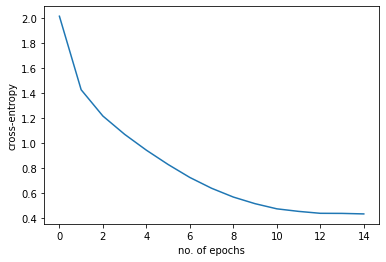

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('no. of epochs')
plt.ylabel('cross-entropy')

The next chunk of code is meant to retrieve the best set of weights in terms of the loss function. 
But it's difficult to know if that will always translate in better predictions when talking about text generation tasks.

In [ ]:
# load the last saved checkpoint
rnn.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
tf.train.latest_checkpoint(checkpoint_dir)

Text generation starts with an input for the model. A sequence of letters of length `seq_length` that the model can digest and predict an output for.

In [ ]:
# pick a random seed
pattern = x[np.random.randint(examples_per_epoch)]

The choosen solution has been to pick a random sequence from the ones already defined from the text. But it can be our own invented sequence. We would need to substitute the code above for

```
# write a seed
start_string = ''
pattern = [char2int[char] for char in start_string]
```

Note the variable `start_string` would need to have the correct length to serve as input to the model.

After choosing an initial string, the generating process is a loop:

- the string if fed to the model and it returns the probabilities for each character.
- the character with the highest probability is chosen as the prediction and written.
- the input of the model is updated;
  + the oldest character is withdrawn and
  + the last prediction is appended at the end of the sequence.
- the new string is fed to the model.

This process repeats for a definded `LENGTH`.

In [ ]:
print('SEED:\n')
print(''.join([int2char[int] for int in pattern]))
print('\nGENERATED:\n')

LENGTH = 500 # size of generated text

# generate characters
for i in range(LENGTH):
  input_eval = np.reshape(pattern, (1, -1))
  predictions = rnn.predict(input_eval, verbose = 0)
  predicted_id = np.argmax(predictions)
  pred = int2char[predicted_id]
 
  sys.stdout.write(pred) # print ouput character
  
  pattern[:-1] = pattern[1:]   # remove first character
  pattern[-1] = predicted_id   # add output character
  
print("\nDone.")

SEED:

is toes?” the Mock Turtle persisted. “How _could_ he turn
them out with his nose, you know?”

“It’s the first position in dancing.” Alice said; but was dreadfully
puzzled by the whole thing, and longed to change the subject.

“Go on with the next ver

GENERATED:

se,” said the King.

“It put in an one again!” said Alice, as she went on, “I’m sure she’s sore to
call it is!”

“Why,” said the Dodo, “the Queen ought to tell her which sorrows and
answer
as it can be Norrowly up and say ‘_Ho_ was a treacle
fetch is it!” he said, turning to the jury, with another moment,
splashed a little shaking hastily. “I think I make out a bat?” when she had not let the table to see what they liked, and their slates, when the puppy began surprised to make out which were
alw
Done.


The probabilities at this stage have nothing to do now that the weight's matrix has been trained.

For instance, we can look at the last one predicted.

Text(0, 0.5, 'probability')

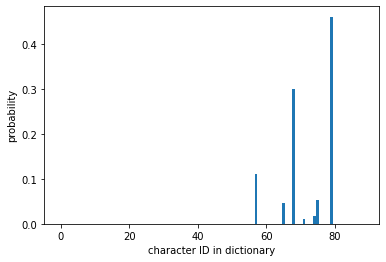

In [ ]:
plt.bar(x = range(predictions.shape[1]), height = predictions[0])
plt.xlabel('character ID in dictionary')
plt.ylabel('probability')

The result, for a modest number of training epochs, seems pretty satisfying. The model has roughly learned to use punctuation marks, capital letters and even mimics Lewis Carroll's style at a certain degree!

Of course, the text lacks coherence, but gramatically speaking, most of it it's correct and that is a big improvement since the text is model from letters.

To try and improve the results we could try:

- Extending the fitting time, allowing the model to adapt even better to the text.
- Trying to create the perfect starting string (difficult).
- Modifying the architecture of the model. Playing with hyperparameters like the number and type of layers. Maybe another `LSTM` layer can help to model the internal state.
- Changing the *n-gram* to take into account more or less words (variable `seq_length`). It can happen that the model is not able to learn that much context or, the other way around; that the context is not enough to grasp actual textual dependencies.

That aside, there is another way to make predictions for text generation tasks.

The main problem the described system has is that, because it always takes the character with the highest probability, it's prone to get stuck in a loop with the same high-probability characters.

If, instead of picking the word with the highest probability, we consider the output of the model as a probability distribution (removing the softmax activation we get the *logits*) over the vocabulary, we can *sample* from that distribution, getting high-probability characters that may change over time when more than one is well suited to be the next prediction.

# The big picture
The architectures described in this text (FFNN, CNN and RNN) are only the basic supervised are inside deep learning.

Even if we remain at a basic level, we have yet to discover the unsupervised side of every machine learning are, adapted in this case to the deep learning field; and, of course, reinforcement learning.

![](https://camo.githubusercontent.com/aa717ae5a4ce2302a6ba50c1c1a532fd566dd236/68747470733a2f2f692e696d6775722e636f6d2f45416c343772702e706e67)

# References
1. García, Mariano, Santiago Zazo, and Miguel Ángel García. 2019. *Signal Analysis for Communications. Second Part: Statistical Signal Processing*. ETSIT - UPM (Dpto. de Señales, Sistemas y Radiocomunicaciones).
1. Géron, Aurélien. 2017. *Hands-on Machine Learning with Scikit-Learn and Tensorflow : Concepts, Tools, and Techniques to Build Intelligent Systems*. Sebastopol, CA: O’Reilly Media.
1. Brownlee, Jason. 2017. *Long Short-Term Memory Networks With Python: Develop Sequence Prediction Models With Deep Learning*. https://machinelearningmastery.com/
1. R. R. Selvaraju, M. Cogswell, A. Das, R. Vedantam, D. Parikh and D. Batra. 2017. *Grad-CAM: Visual Explanations from Deep Networks via Gradient-Based Localization*. IEEE International Conference on Computer Vision (ICCV), Venice, 2017, pp. 618-626. doi: 10.1109/ICCV.2017.74.
1. Olah, et al. *The Building Blocks of Interpretability*, Distill, 2018.
1. Karen Simonyan and Andrew Zisserman. *Very Deep Convolutional Networks for Large Scale Image Recognition*. 2014. https://arxiv.org/pdf/1409.1556.pdf
1. R2RT. *Written Memories: Understanding, Deriving and Extending the LSTM*. 2016. https://r2rt.com/written-memories-understanding-deriving-and-extending-the-lstm.html
1. Tensorflow. *Text generation with an RNN*. https://www.tensorflow.org/tutorials/text/text_generation
